<center><h1>Social Anxiety Level Classification Project 🧠📊</h1></center>

<center>
  <img src="https://i.pinimg.com/736x/ef/68/79/ef687925611c2a5abc1afcdd5bfb7659.jpg" 
       style="max-width:30%; border-radius:10px;">
</center>

<p style="text-align: justify; font-size:18px;">According to the National Institute of Mental Health (NIH), social anxiety is a common type of anxiety disorder. People suffering from social anxiety exhibit various symptoms, including and not limited to: sweating, trempling, rapid heart rate, and/or  feeling their brain goes blank during situations when they might be evaluated or judged by others.</p>
<p style="text-align: justify; font-size:18px;">
    This project is part of the Supervised Machine Learning: Classification course within the  <span style="font-weight: bold;">IBM Machine Learning Professional Certificate.</span> It focuses on building and evaluating models to classify social anxiety levels 
</p>
<p style="text-align: justify; font-size:18px;">
    The goal of this project is to apply classification techniques to accurately predict social anxiety levels, aiding in better understanding and identification of individuals who may benefit from further intervention.
<br/>
Throughout this notebook, you will find data exploration, preprocessing, model training, evaluation, and interpretation of results related to social anxiety classification.
</p>


# Dataset Descritpion



This dataset was created using real-world survey responses and observational research focused on behavioral and psychological factors linked to social anxiety. It is obtained from @natezhang123 , @xipeng, and @docxian on Kaggle.

**Disclaimer (as stated by the dataset authors):**  
The dataset is intended for educational and research purposes only. It should not be used for clinical diagnosis or treatment.

**Note:**  
This project is conducted solely for educational purposes. It is not intended to be used for professional or clinical decision-making.

### Features: 

#### Demographics:
* <span style="font-weight: bold;">Age:</span> the patien's age in years.
* <span style="font-weight: bold;">Gender:</span> Female, Male, and Other.
* <span style="font-weight: bold;">Occupation:</span> the patient's job.

#### Lifestyle:
* <span style="font-weight: bold;">Sleep Hours:</span> Number of hours a patient sleeps in a day.
* <span style="font-weight: bold;">Physical Activity:</span> Number of active hours per week
* <span style="font-weight: bold;">Caffeine intake:</span> Daily caffeine intake measured in milligram.
* <span style="font-weight: bold;">Alchol Consumption:</span> Number of drinks per week.
* <span style="font-weight: bold;">Smoking:</span> Indicates if the patient smokes.
* <span style="font-weight: bold;">Diet Quality:</span> Patient's diet quality level on a scale of 1 to 10, where 1 represent low-quality diet and 10 represents high-quality diet.

#### Mental Health History:
* <span style="font-weight: bold;">Family History of Anxiety:</span> Presence of anxiety in family medical history.
* <span style="font-weight: bold;">Medication:</span> Indicates whether the patient takes medication.
* <span style="font-weight: bold;">Therapy Sessions:</span> Number of therapy sessions a patient attends in a month.
*  <span style="font-weight: bold;">Medication:</span>
  
#### Health & Mental Indicators:
* <span style="font-weight: bold;">Street Level:</span> Patient's stress level on a scale of 1 to 10, where 1 represents low stress and 10 represents high stress.
* <span style="font-weight: bold;">Heart Rate (BPM):</span> Patient's heart rate in beats per minute.
* <span style="font-weight: bold;">Breating Rate:</span> Patient's breating rate measured in number of breaths per minute.
* <span style="font-weight: bold;">Sweating Level:</span> Patient's sweating level on a scale of 1 to 5.
* <span style="font-weight: bold;">Dizziniess:</span> Indicates whether the patient experiences dizziness.

#### Life Events:
* <span style="font-weight: bold;">Recent Major Life Event:</span>  Indicates whether the patient has experienced a major life event recently.

#### Target Variable
* <span style="font-weight: bold;">Anxiety Level:</span> Represents the severity of the patient’s social anxiety on a 1–10 scale.

# Importing necessary libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Loading data

In [2]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/social-anxiety-dataset/family_anxiety_14_dataset.csv
/kaggle/input/social-anxiety-dataset/enhanced_anxiety_dataset.csv


In [3]:
df = pd.read_csv('/kaggle/input/social-anxiety-dataset/enhanced_anxiety_dataset.csv')

# 🗂️ Data Profiling  

In [4]:
# count of patients and features
df.shape

(11000, 19)

## 1. Getting an overview of the dataset
<p style="font-size: 16px;">Categorical features need to be encoded</p>

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

## 2. Getting descriptive details of the dataset

In [6]:
# numerical features
df.describe()

,Age,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Therapy Sessions (per month),Diet Quality (1-10),Anxiety Level (1-10)
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000
mean,40.241727,6.650691,2.942136,286.090000,9.701636,5.856364,90.916000,20.957545,3.080636,2.427818,5.181818,3.929364
std,13.236140,1.227509,1.827825,144.813157,5.689713,2.927202,17.325721,5.160107,1.398877,2.183106,2.895243,2.122533
min,18.000000,2.300000,0.000000,0.000000,0.000000,1.000000,60.000000,12.000000,1.000000,0.000000,1.000000,1.000000
25%,29.000000,5.900000,1.500000,172.000000,5.000000,3.000000,76.000000,17.000000,2.000000,1.000000,3.000000,2.000000
50%,40.000000,6.700000,2.800000,273.000000,10.000000,6.000000,92.000000,21.000000,3.000000,2.000000,5.000000,4.000000
75%,51.000000,7.500000,4.200000,382.000000,15.000000,8.000000,106.000000,25.000000,4.000000,4.000000,8.000000,5.000000
max,64.000000,11.300000,10.100000,599.000000,19.000000,10.000000,119.000000,29.000000,5.000000,12.000000,10.000000,10.000000


<p style="font-size:18px;"><b>Observations based on descriptive statistics:</b></p>
<p style="font-size:16px;">
1. All patients in the dataset are adults. <br/>
2. Some individuals appear to be inactive or unemployed. <br/>
3. The average caffeine consumption is moderate. However, some patients consume very high amounts, while others report none. <br/>
4. A few patients have high reported alcohol consumption, which might suggest potential overuse. <br/>
5. Some patients report attending zero therapy sessions per month. <br/>
</p>


In [7]:
# categorical features
df.describe(include='object')

,Gender,Occupation,Smoking,Family History of Anxiety,Dizziness,Medication,Recent Major Life Event
count,11000,11000,11000,11000,11000,11000,11000
unique,3,13,2,2,2,2,2
top,Female,Musician,Yes,Yes,Yes,Yes,Yes
freq,3730,892,5779,5847,5672,5666,5623


<p style="font-size:18px;"><b>Observations based on descriptive statistics:</b></p>
<p style="font-size:16px;">
    1. It seems that females experience social anxiety more than males. However, it is important to note that some patients did not disclose their gender. <br/>
    2. More than half of the patients smoke, have a family history of anxiety, experience dizziness, use medication, and have recently gone through major life events.
</p>


# 🔍 Data Quality Checking 

## ✅ Reliability

<p style="font-size:16px;">This dataset is obtained from Kaggle https://www.kaggle.com/datasets/natezhang123/social-anxiety-dataset/data for only educational and reserach purposes</p>

## 🕒 Timeliness

<p style="font-size:16px;">The dataset was uploaded in Kaggle two months ago (approximate date: May 2025)</p>

## ✅ Consistency

<p style="font-size:16px;">The dataset variables are consistent.</p>

## 🎯 Relevance

<p style="font-size:16px;">The sample is appropriate and all columns are related for the analysis.</p>

## ✨ Uniqueness

<p style="font-size:16px;">All the data points themselves are unique. It is acceptable for all features to have duplicated values.</p>

In [8]:
df.duplicated().sum()

0

## 🧩 Completeness

In [9]:
df.isna().sum()

Age                                  0
Gender                               0
Occupation                           0
Sleep Hours                          0
Physical Activity (hrs/week)         0
Caffeine Intake (mg/day)             0
Alcohol Consumption (drinks/week)    0
Smoking                              0
Family History of Anxiety            0
Stress Level (1-10)                  0
Heart Rate (bpm)                     0
Breathing Rate (breaths/min)         0
Sweating Level (1-5)                 0
Dizziness                            0
Medication                           0
Therapy Sessions (per month)         0
Recent Major Life Event              0
Diet Quality (1-10)                  0
Anxiety Level (1-10)                 0
dtype: int64

## 🎯 Accuracy

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                11000 non-null  int64  
 1   Gender                             11000 non-null  object 
 2   Occupation                         11000 non-null  object 
 3   Sleep Hours                        11000 non-null  float64
 4   Physical Activity (hrs/week)       11000 non-null  float64
 5   Caffeine Intake (mg/day)           11000 non-null  int64  
 6   Alcohol Consumption (drinks/week)  11000 non-null  int64  
 7   Smoking                            11000 non-null  object 
 8   Family History of Anxiety          11000 non-null  object 
 9   Stress Level (1-10)                11000 non-null  int64  
 10  Heart Rate (bpm)                   11000 non-null  int64  
 11  Breathing Rate (breaths/min)       11000 non-null  int

In [11]:
# converting Anxiety Level dtype to int for classification
df['Anxiety Level (1-10)'] = df['Anxiety Level (1-10)'].astype(int)

In [12]:
# mapping yes's and no's to 1s and 0s for models 
df['Smoking'] = df['Smoking'].map({'Yes':1, 'No':0})
df['Family History of Anxiety'] = df['Family History of Anxiety'].map({'Yes':1, 'No':0})
df['Dizziness'] = df['Dizziness'].map({'Yes':1, 'No':0})
df['Medication'] = df['Medication'].map({'Yes':1, 'No':0})
df['Recent Major Life Event'] = df['Recent Major Life Event'].map({'Yes':1, 'No':0})

In [13]:
df.head()

,Age,Gender,Occupation,Sleep Hours,Physical Activity (hrs/week),Caffeine Intake (mg/day),Alcohol Consumption (drinks/week),Smoking,Family History of Anxiety,Stress Level (1-10),Heart Rate (bpm),Breathing Rate (breaths/min),Sweating Level (1-5),Dizziness,Medication,Therapy Sessions (per month),Recent Major Life Event,Diet Quality (1-10),Anxiety Level (1-10)
0,29,Female,Artist,6.0,2.7,181,10,1,0,10,114,14,4,0,1,3,1,7,5
1,46,Other,Nurse,6.2,5.7,200,8,1,1,1,62,23,2,1,0,2,0,8,3
2,64,Male,Other,5.0,3.7,117,4,0,1,1,91,28,3,0,0,1,1,1,1
3,20,Female,Scientist,5.8,2.8,360,6,1,0,4,86,17,3,0,0,0,0,1,2
4,49,Female,Other,8.2,2.3,247,4,1,0,1,98,19,4,1,1,1,0,3,1


### 🔍 Detecting Outliers

Text(0, 0.5, 'Count of Sleep Hours')

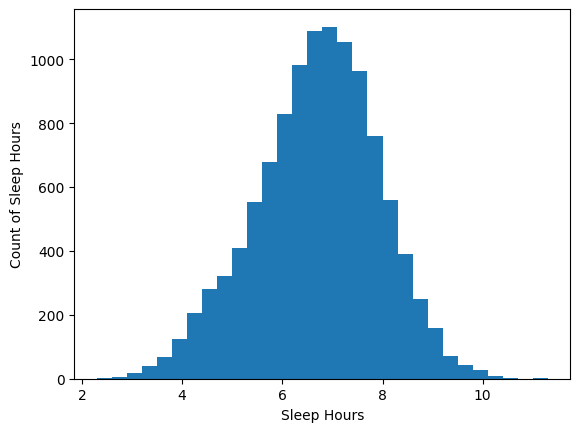

In [14]:
plt.hist(bins=30, x=df['Sleep Hours'])
plt.xlabel('Sleep Hours')
plt.ylabel('Count of Sleep Hours')

Text(0, 0.5, 'Count of Physcial Activity Hours')

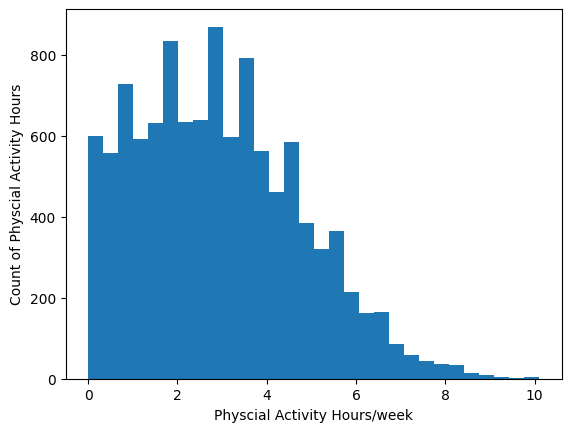

In [15]:
plt.hist(bins=30, x=df['Physical Activity (hrs/week)'])
plt.xlabel('Physcial Activity Hours/week')
plt.ylabel('Count of Physcial Activity Hours')

Text(0, 0.5, 'Count of Caffeine')

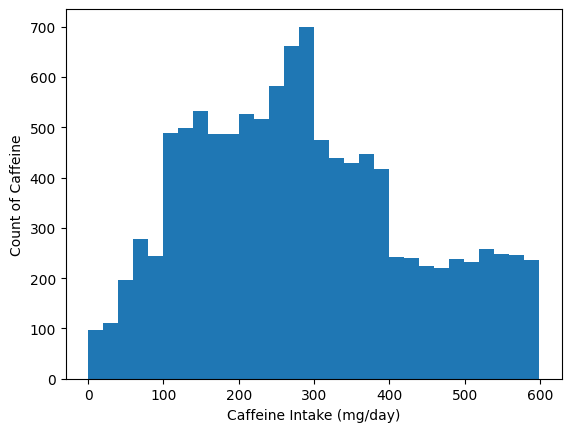

In [16]:
plt.hist(bins=30, x=df['Caffeine Intake (mg/day)'])
plt.xlabel('Caffeine Intake (mg/day)')
plt.ylabel('Count of Caffeine')

Text(0, 0.5, 'Count of Caffeine')

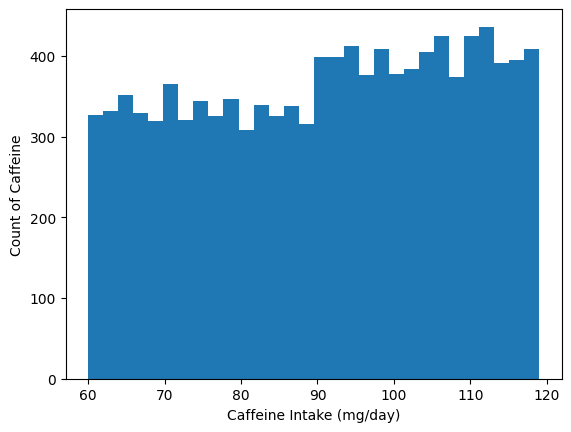

In [17]:
plt.hist(bins=30, x=df['Heart Rate (bpm)'])
plt.xlabel('Caffeine Intake (mg/day)')
plt.ylabel('Count of Caffeine')

Text(0, 0.5, 'Count of Caffeine')

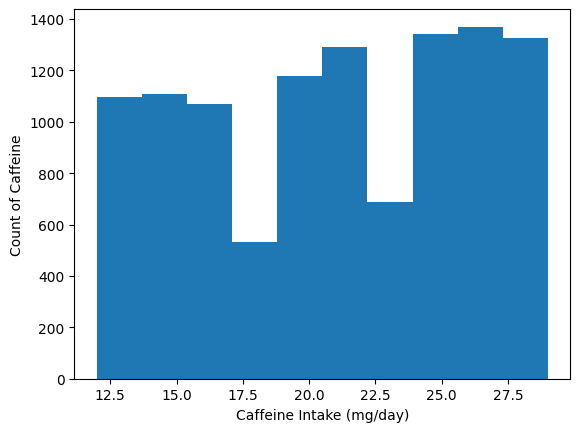

In [18]:
plt.hist(x=df['Breathing Rate (breaths/min)'])
plt.xlabel('Caffeine Intake (mg/day)')
plt.ylabel('Count of Caffeine')

Text(0, 0.5, 'Count of Caffeine')

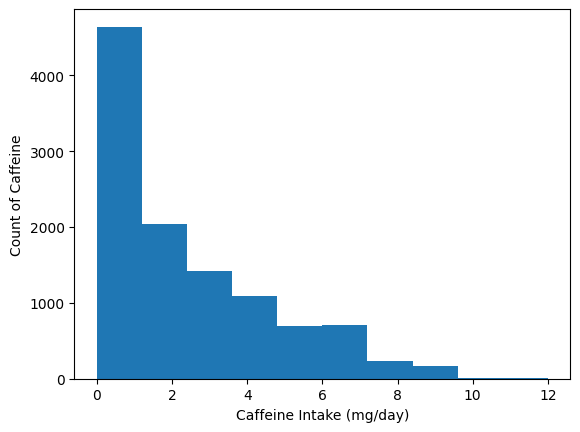

In [19]:
plt.hist(x=df['Therapy Sessions (per month)'])
plt.xlabel('Caffeine Intake (mg/day)')
plt.ylabel('Count of Caffeine')

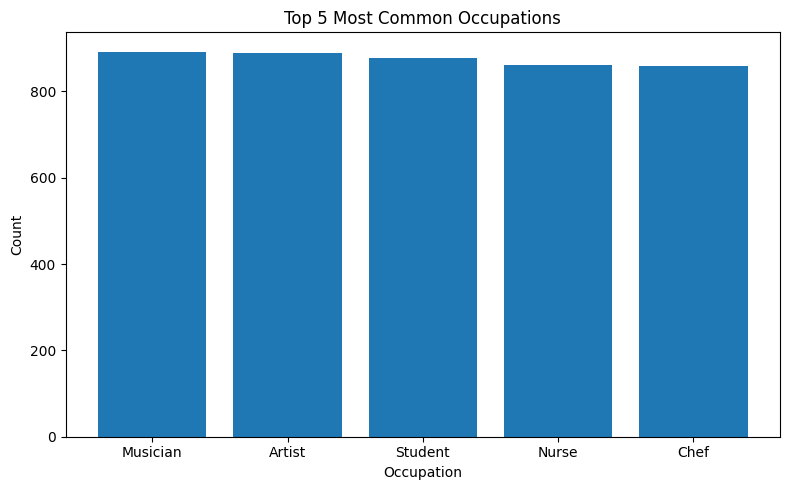

In [20]:
most_occupied_jobs = df['Occupation'].value_counts().head()
plt.figure(figsize=(8, 5))
plt.bar(most_occupied_jobs.index, most_occupied_jobs.values)
plt.title('Top 5 Most Common Occupations')
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

In [21]:
print(df[df['Alcohol Consumption (drinks/week)'] > df['Alcohol Consumption (drinks/week)'].mean()].shape)
print(df[df['Alcohol Consumption (drinks/week)'] < df['Alcohol Consumption (drinks/week)'].mean()].shape)

(5587, 19)
(5413, 19)
